In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import statsmodels.api as sm

In [22]:
weekly = pd.read_csv('Weekly.csv')

In [23]:
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [24]:
count_up = (weekly['Direction'] == 'Up').sum()
count_up

np.int64(605)

605 of the 1089 rows have a direction of up, indicating that there is a better of chance of improvement than regression on a weekly basis.

<function matplotlib.pyplot.show(close=None, block=None)>

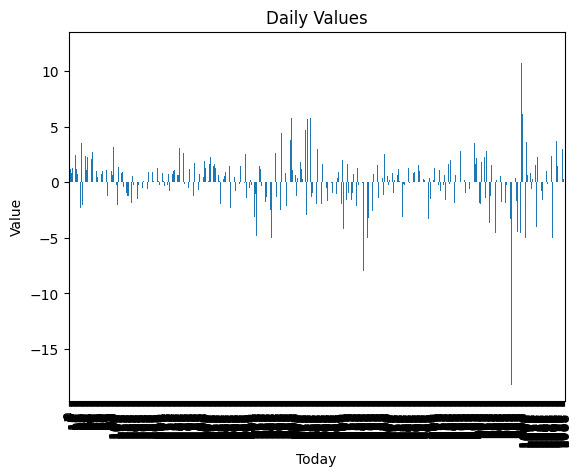

In [7]:
weekly['Today'].plot(kind='bar')
plt.title(f'Daily Values')
plt.xlabel('Today')
plt.ylabel('Value')
plt.show

In this boxplot, you can see which days the values were positive or negative, and see them relative to the weeks, months, and years before. There is not a noticeable trend in why the data is doing what it is doing.

In [25]:
weekly['Direction'] = weekly['Direction'].map({'Up': 1, 'Down': 0})

In [26]:
weekly['Direction'].unique()

array([0, 1])

In [10]:
predictors = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
X = weekly[predictors]
y = weekly['Direction']

X = sm.add_constant(X)

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                0.006580
Time:                        01:31:34   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

None of the lag or volume predictors look like they have a significant impact on the direction. Lag 2 has the highest positive coefficient at 0.0584, and Lag 1 has the largest negative coefficient at -0.0413, which are both non-significant relative to other models.

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [28]:
X = weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']]
Y = weekly['Direction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

ValueError: Input y contains NaN.

In [29]:
nan_values = weekly['Direction'].isna().sum()
nan_values

np.int64(0)

In [30]:
train_data = weekly[weekly['Year'] < 2009]
test_data = weekly[weekly['Year'] >= 2009]
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = test_data[['Lag2']]
y_test = test_data['Direction']
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

Confusion Matrix:
[[ 9 34]
 [ 5 56]]

Overall Fraction of Correct Predictions (Accuracy): 0.625


In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [33]:
train_data = weekly[weekly['Year'] < 2009]
test_data = weekly[weekly['Year'] >= 2009]
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = test_data[['Lag2']]
y_test = test_data['Direction']
lda_model = LDA()
lda_model.fit(X_train, y_train)
y_pred = lda_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

Confusion Matrix:
[[ 9 34]
 [ 5 56]]

Overall Fraction of Correct Predictions (Accuracy): 0.625


In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [35]:
train_data = weekly[weekly['Year'] < 2009]
test_data = weekly[weekly['Year'] >= 2009]
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = test_data[['Lag2']]
y_test = test_data['Direction']
qda_model = QDA()
qda_model.fit(X_train, y_train)
y_pred = qda_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

Confusion Matrix:
[[ 0 43]
 [ 0 61]]

Overall Fraction of Correct Predictions (Accuracy): 0.5865384615384616


In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
train_data = weekly[weekly['Year'] < 2009]
test_data = weekly[weekly['Year'] >= 2009]
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = test_data[['Lag2']]
y_test = test_data['Direction']
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

Confusion Matrix:
[[22 21]
 [32 29]]

Overall Fraction of Correct Predictions (Accuracy): 0.49038461538461536


In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
train_data = weekly[weekly['Year'] < 2009]
test_data = weekly[weekly['Year'] >= 2009]
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = test_data[['Lag2']]
y_test = test_data['Direction']
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nOverall Fraction of Correct Predictions (Accuracy):", accuracy)

Confusion Matrix:
[[ 0 43]
 [ 0 61]]

Overall Fraction of Correct Predictions (Accuracy): 0.5865384615384616


The logistic regression and LDA models had the highest percentage of correct predictions, so those would be considered the best models. The KNN model, on the other hand, was the worst predictor by almost 10%!

In [40]:
auto = pd.read_csv('Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [41]:
median_mpg = auto['mpg'].median()
auto['mpg01'] = (auto['mpg'] > median_mpg).astype(int)

In [42]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


In [43]:
import seaborn as sns

In [44]:
sns.set(style="whitegrid")

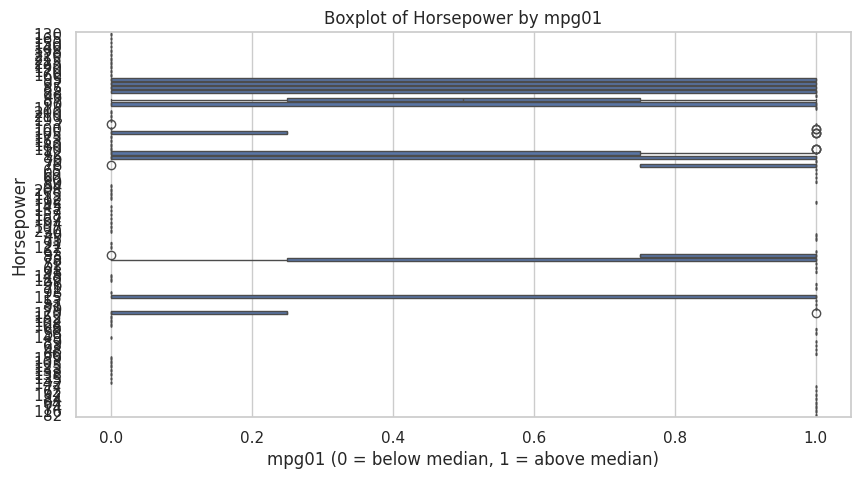

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='mpg01', y='horsepower', data=auto)
plt.title('Boxplot of Horsepower by mpg01')
plt.xlabel('mpg01 (0 = below median, 1 = above median)')
plt.ylabel('Horsepower')
plt.show()

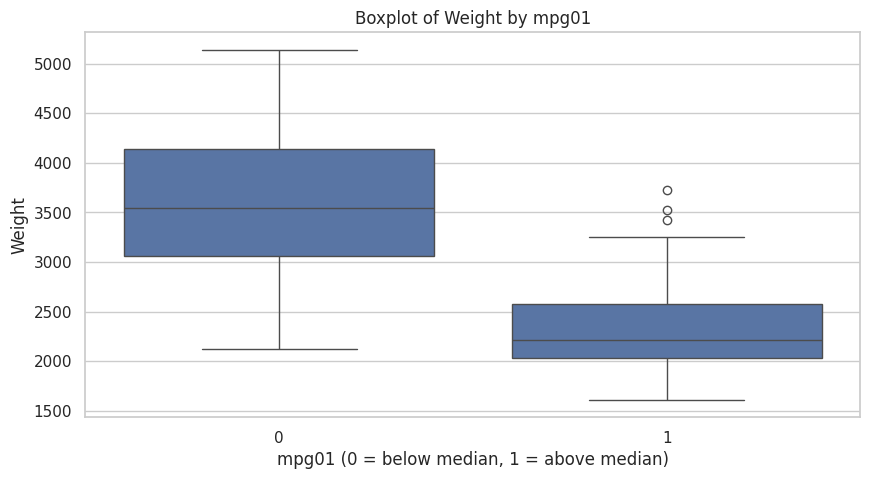

In [47]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='mpg01', y='weight', data=auto)
plt.title('Boxplot of Weight by mpg01')
plt.xlabel('mpg01 (0 = below median, 1 = above median)')
plt.ylabel('Weight')
plt.show()

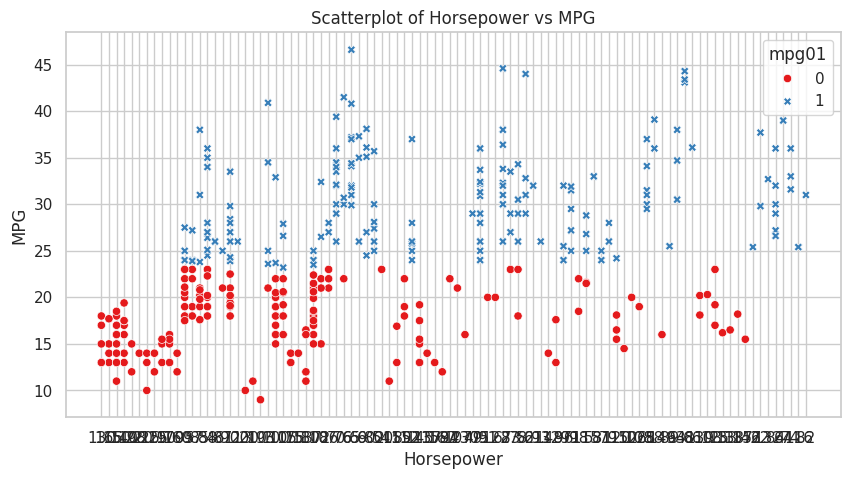

In [48]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='horsepower', y='mpg', hue='mpg01', style='mpg01', data=auto, palette='Set1')
plt.title('Scatterplot of Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

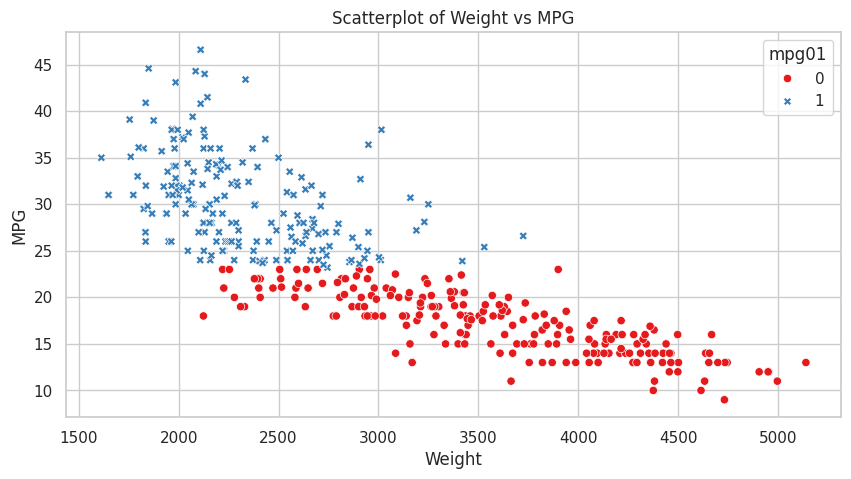

In [49]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='weight', y='mpg', hue='mpg01', style='mpg01', data=auto, palette='Set1')
plt.title('Scatterplot of Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

All 4 of the graphs show that most of the lighter cars have better gas mileage, while the heavy cars get bad gas mileage. This is shown best in the scatterplot, as you can clearly see the difference in the "X" and the "O" characters gas mileage by weight.

In [52]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto = auto.dropna()

In [53]:
X = auto[['horsepower', 'weight']]
y = auto['mpg01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
lda_model = LDA()
lda_model.fit(X_train, y_train)
y_pred = lda_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy
print("Confusion Matrix:")
print(cm)
print("\nTest Error:", test_error)

Confusion Matrix:
[[30 13]
 [ 0 36]]

Test Error: 0.16455696202531644


In [55]:
qda_model = QDA()
qda_model.fit(X_train, y_train)
y_pred = qda_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy  # Test error is 1 - accuracy
print("Confusion Matrix:")
print(cm)
print("\nTest Error:", test_error)

Confusion Matrix:
[[33 10]
 [ 1 35]]

Test Error: 0.1392405063291139


In [56]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy 
print("Confusion Matrix:")
print(cm)
print("\nTest Error:", test_error)

Confusion Matrix:
[[38  5]
 [ 1 35]]

Test Error: 0.07594936708860756


In [57]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred = naive_bayes_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy 
print("Confusion Matrix:")
print(cm)
print("\nTest Error:", test_error)

Confusion Matrix:
[[32 11]
 [ 1 35]]

Test Error: 0.15189873417721522


In [58]:
k_values = [1, 5, 10, 100]
test_errors = {}
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_error = 1 - accuracy  # Test error is 1 - accuracy
    test_errors[k] = test_error
    print(f'Test Error for K={k}: {test_error:.4f}')
print("\nSummary of Test Errors:")
for k, error in test_errors.items():
    print(f"K={k}: Test Error = {error:.4f}")

Test Error for K=1: 0.1139
Test Error for K=5: 0.0886
Test Error for K=10: 0.0759
Test Error for K=100: 0.1139

Summary of Test Errors:
K=1: Test Error = 0.1139
K=5: Test Error = 0.0886
K=10: Test Error = 0.0759
K=100: Test Error = 0.1139


10 would be the best k-value for this equation, with a test error of a lowly 0.0759. 5 is a close second. Surprisingly, k = 1 and k = 100 brings back the same exact test error. Overall, using the logistic regression or using KNN with K = 10 would be the best options.